# Pandas Basics
In python, the `pandas` package is the most popular data-frame (i.e., 2-dimensional) manipulation framework. You can think of it like `dplyr` for python. This notebook will walk you through some of the basics of working with dataframes, as well as plotting with `altair` (a popular graphics package). 

## Creating DataFrames
Let's create a dataframe representing 1000 houses that has the following columns:
- `house_id`: This should be `"house_N"`, where `N` is the house number (i.e., `house_1`)
- `neighborhood`: There should be 5 neighborhoods, `"a"` through `"e"` (200 of each)
- `price_2010`: The price (in USD) of the house in 2010 (can be _float_)
- `price_2018`: The price (in USD) of the house in 2010 (can be _float_)

In [201]:
# Import the pandas, numpy, and altair packages (as pd, np, and alt respectively)
import pandas as pd
import numpy as np
import altair as alt


In [202]:
# Create a _list_ of houses ("house_N") 1 through 1000 (hint: use a list comprehension)
house_N = ['house_' + str(i+1) for i in range (1000)]


In [203]:
# Create a list of neighborhoods `a` thorugh `e` that is 1000 elements long. Hint: *multiply* a list...
neighborhood = (['a','b','c','d','e']) * 200


In [204]:
# Creaet a list of 1000 home prices (for the year 2010) that range uniformly from 50000 to 400000 using np.random
price_2010 = []
for x in range(1000):
    price_2010.append(np.random.uniform(50000, 400000))


In [205]:
# Create a list of 1000 home prices (for the year 2018) by multiplying the 2010 price by a random number
# The number should be drawn randomly from a normal distribution with mean 1.5 and standard deviation .5
price_2018=[]

for p in price_2010 :
    price_2018.append(np.random.normal(1.5, .5) * p)

In [206]:
# Create a dataframe `houses` with each list above as a column. Use the pd.DataFrame() function
data = ({'house': house_N, 'neighborhoods': neighborhood, 'price_2010' : price_2010, 
  'price_2018' : price_2018})

houses = pd.DataFrame(data)
print(houses)

          house neighborhoods     price_2010     price_2018
0       house_1             a  188384.989406  348497.611352
1       house_2             b  164389.566810  239174.217384
2       house_3             c  321754.702742  406309.755217
3       house_4             d   59325.062369   95824.091360
4       house_5             e  275785.696664  110500.909542
5       house_6             a   75821.957007  123821.455793
6       house_7             b  128804.394798  231200.491827
7       house_8             c   75861.911924  141446.775339
8       house_9             d  191417.965983  366155.637097
9      house_10             e  122861.667377  295648.624183
10     house_11             a   80784.505583  102658.516782
11     house_12             b  231484.635105  274689.690518
12     house_13             c  352519.466313  553220.019674
13     house_14             d  222298.769218  267945.718641
14     house_15             e  319756.737219  420549.700958
15     house_16             a  320193.02

# Accessing DataFrames
In this section, you'll extract and compute information of interest using dataframe **properties** and **methods**

In [207]:
# What is the _shape_ of the dataframe?
houses.shape

(1000, 4)

In [208]:
# What is the maximum house price in 2018 (hint: use the `.max()` method
np.amax(price_2018)

1146045.5374919255

In [209]:
# What are the summary statistics of the dataframe (hint: use the `.describe()` method)
houses.describe()

,price_2010,price_2018
count,1000.000000,1.000000e+03
mean,230651.660436,3.460738e+05
std,104193.055643,1.992069e+05
min,50963.691451,-4.534732e+04
25%,138018.964970,1.862301e+05
50%,232684.035595,3.129504e+05
75%,322267.465124,4.760418e+05
max,399927.013230,1.146046e+06


In [210]:
# What was the median house price in 2018 (hint: use the `.median()` method)
np.median(price_2018)

312950.3642677333

In [211]:
# In which neighborhood was the cheapest house in 2010?
# Hint: you can subset a dataframe using df[df.col == value]
#minimum = np.min(price_2010)
#print(minimum)

b = houses[houses.price_2010 == min(houses.price_2010)].neighborhoods.item()
print(b)

d


## Aggregating data
Just like `dplyr`, pandas has a `groupby` method in which you can _group_ a dataframe by a column of interest, and then _aggregate_ (`agg`) your columns using a given function (i.e., `mean`, `sum`, `median`, etc.). Note, this will create a row `index` (i.e., row name) for your dataframe

In [221]:
# What was the median home price _in each neighborhood_ in each year? 
# Create a new variable of these values.
neighborhood_median = houses.groupby(['neighborhoods']).median()
median_2010_a = neighborhood_median.loc['a','price_2010']
median_2010_b = neighborhood_median.loc['b','price_2010']
median_2010_c = neighborhood_median.loc['c','price_2010']
median_2010_d = neighborhood_median.loc['d','price_2010']
median_2010_e = neighborhood_median.loc['e','price_2010']

median_2018_a = neighborhood_median.loc['a','price_2018']
median_2018_b = neighborhood_median.loc['b','price_2018']
median_2018_c = neighborhood_median.loc['c','price_2018']
median_2018_d = neighborhood_median.loc['d','price_2018']
median_2018_e = neighborhood_median.loc['e','price_2018']

print(neighborhood_median)

                  price_2010     price_2018
neighborhoods                              
a              232762.894872  292006.708078
b              247439.842144  340391.997676
c              243920.426470  342628.085718
d              227918.930253  296083.172123
e              215550.818621  297346.442093


In [222]:
# Get the prices for neighborhood 'b'. 
# Note, you can now use the df.loc[rows, columns] to select by row name
median_b = neighborhood_median.loc['b']
print(median_b)

price_2010    247439.842144
price_2018    340391.997676
Name: b, dtype: float64


## Visualizing data
In this section, we'll use `altair` to create a few plots. You may want to reference the [documentation](https://altair-viz.github.io) or [examples](https://altair-viz.github.io/gallery/index.html). You will need to **install** `altair` by following instructions [here](https://altair-viz.github.io/getting_started/installation.html#installation-notebook). Be sure to run `alt.renderers.enable('notebook')` once in this notebook to enable plots.

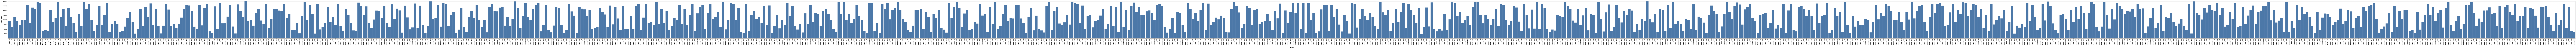

In [237]:
# Create a histogram of prices in 2010 using `alt.Chart` with `mark_bar()`.
from vega_datasets import data
alt.renderers.enable('notebook')

alt.Chart(houses).mark_bar().encode(
    x='house', y='price_2010')


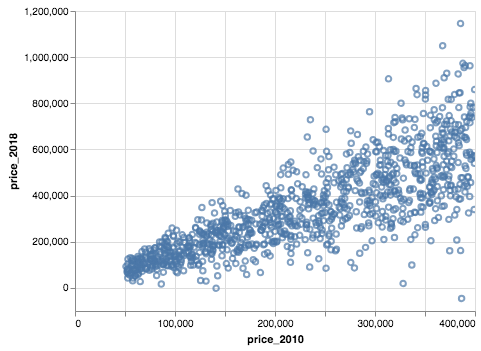

In [215]:
# Create a scatterplot of prices in 2010 v.s. prices in 2018 using `alt.Chart` with `mark_point()`.
# Hint: set the opacity of the points so it's easier to see clustered values.
from vega_datasets import data
alt.renderers.enable('notebook')

scatter = alt.Chart(houses).mark_point().encode(
    x='price_2010',
    y='price_2018').interactive()

scatter

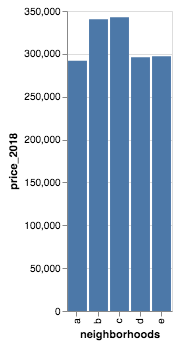

In [231]:
# To compare median house prices in 2018 by neighborhood, 
# Make a bar chart of the median house price in each neighborhood 
# (use your aggregated data from above)
# Hint: you'll use the `index` of the dataframe as the `x` of your bar chart
from vega_datasets import data
alt.renderers.enable('notebook')

chart = alt.Chart(neighborhood_median.reset_index()).mark_bar().encode(
    x='neighborhoods', y='price_2018')
chart


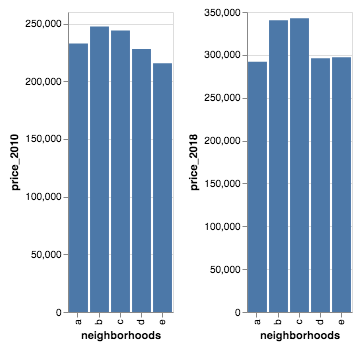

In [234]:
# Finally, let's create *two adjacent bar charts* of price by neighborhood (2010, 2018)
# Use the *same y axis*
# Hint: "repeat" the Y values once for each column. 
# See https://altair-viz.github.io/user_guide/compound_charts.html?highlight=repeat#repeated-charts

alt.Chart(neighborhood_median.reset_index()).mark_bar().encode(
    alt.X(alt.repeat('row'), type='ordinal'),
    alt.Y(alt.repeat('column'), type='quantitative')
).repeat(
    row=['neighborhoods'],
    column=['price_2010', 'price_2018']
)
